In [1]:
# system ----
import os
import sys
import h5py
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
 
# !!! you will have to edit this to your local computer

# local ----
try:
    localPath = os.path.expanduser("~/")
    projPath = os.path.expanduser(f"{localPath}Desktop/work/jpl/analysis")
    sys.path.append(projPath+"/modules")
    import plot_parameters 
except IOError:
    pass

# !!! 

In [2]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerBase

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

---

# Load-in data

In [15]:
lens_list = []

lens_list.append("HE0435_Millon2020")
lens_list.append("RXJ1131_Millon2020")

In [152]:
class base_analysis(object):
    """Just a class to contain the base analysis attributes"""
    def __init__(self, lensName: str) -> None:
        self.lensName = lensName
    
    # ------------------------------------------------------------------------------------------
    
    def load_df(self, index_w_time: bool = True) -> None:
        # import time domain (light curve) data
        dataPath = f"{localPath}Desktop/work/jpl/lens_data"
        dataFile = f"{dataPath}/{self.lensName}.csv"
        
        # Show unprocessed file contents
        if index_w_time:
            df = pd.read_csv(dataFile, index_col=0)
        else:
            df = pd.read_csv(dataFile)
        return df
    
    # ------------------------------------------------------------------------------------------
    
    def load_objects(self) -> None:
        """
        """
        results = dict()
        
        # load pandas dataframe
        df = self.load_df()
        
        # partition out string list and names
        col_str_list = df.columns.values.tolist()
        results["column.names"] = []
        results["object.names"] = []
        for col_str in col_str_list:
            col_str_split = col_str.split('_')
            if "mag" in col_str_split:
                results["column.names"].append(col_str)
                results["object.names"].append(col_str_split[-1])
        return results
    
    # ------------------------------------------------------------------------------------------

    def plot(self, lensObject: str = None, mag_sep=None) -> None:
        """
        """
        
        # partition out string list and names
        pobj = self.load_objects()
        col_str_list = pobj['column.names']
        obj_list = pobj['object.names']
        if lensObject == None:
            raise ValueError(f"!!! Must specify object from available list: {obj_list} !!!")   
        
        # load pandas dataframe
        df = self.load_df()
        
        # Initialize figure
        fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                                nrows=1, ncols=1, dpi=100)
        plt.subplots_adjust(wspace=0.1, hspace=0.035)
        ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
        ax.set_xscale('linear'); ax.set_yscale('linear');
        ax.set_xlim(df.index[0]-300, df.index[-1]+300)
        ax.invert_yaxis()
        
        # plot labels
        object_name_split = self.lensName.split('_')
        ax.set_title(fr'$\rm {object_name_split[0]}$', fontsize=30.0)
        ax.set_xlabel(r'$\rm HJD - 2400000.5\ [day]$'); 
        ax.set_ylabel(r'$\rm Magnitude\ [apparent]$')
        
        # define matplotlib colors
        c1 = 'm'
        c2 = 'c'
        c3 = 'darkgray'
        c4 = 'crimson'
        clist = [c1, c2, c3, c4]
    
        # plot scatter data    
        if isinstance(lensObject, list):
            if not all(isinstance(item, str) for item in lensObject):
                plt.close(fig)
                raise ValueError(f"!!! Your lens object list must all be strings !!!")
            #elif not any():
            #    pass
            else:
                if (isinstance(mag_sep, list)) and (len(mag_sep) != len(lensObject)):
                    plt.close(fig)
                    raise ValueError(f"!!! Your lens object list must be the same size as the magnitude seperation list !!!")
                else:
                    from matplotlib.patches import Rectangle
                    empty = Rectangle((0,0), 0, 0, alpha=0.0)
                    empt_list = [empty] * len(lensObject)
                    labl_list = []
                    for ind, (obj, sep) in enumerate(zip(lensObject, mag_sep)):
                        x = df.index
                        if mag_sep == None:
                            y = df[f'mag_{obj}']
                            labl_list.append(fr"\boldmath${obj}$")
                        else:
                            y = df[f'mag_{obj}'] + mag_sep[ind]
                            labl_list.append(r"\boldmath${%s}_{+%.1f}$" % (obj, sep))
                        ax.scatter(x, y, c=clist[ind])
                    sim_leg = ax.legend(empt_list, labl_list, title=r"\boldmath$Objects$", title_fontsize=15.5, 
                                        loc="best", frameon=False, ncol=1,
                                        fontsize=12.5, handlelength=0, handletextpad=0, labelspacing=0.05)
                    for ind in range(len(lensObject)): sim_leg.get_texts()[ind].set_color(clist[ind])
                    ax.add_artist(sim_leg)
                
        elif isinstance(lensObject, str):
            try:
                ax.scatter(df.index, df[f"mag_{lensObject}"], c='dimgray')
            except KeyError:
                plt.close(fig)
                print(f"!!! Must specify object from available list: {obj_list} !!!")
            else:
                from matplotlib.patches import Rectangle
                empty = Rectangle((0,0), 0, 0, alpha=0.0)
                empt_list = [empty]
                sim_leg = ax.legend(empt_list, [fr'\boldmath$Object\ {lensObject}$'],
                               loc="best", frameon=False, ncol=1,
                               fontsize=20.5, handlelength=0, handletextpad=0, labelspacing=0.05)
                sim_leg.get_texts()[0].set_color('k')
                ax.add_artist(sim_leg)
                
        return fig, ax   

### Basic `pandas` dataframe architecture!

In [93]:
df = base_analysis(lensName="HE0435_Millon2020").load_df()
print(f"Number of (rows, columns): {df.shape}")
df

Number of (rows, columns): (1002, 9)


,mag_A,magerr_A,mag_B,magerr_B,mag_C,magerr_C,mag_D,magerr_D,telescope
mhjd,,,,,,,,,
52863.88300,-10.91666,0.01310,-10.38366,0.01920,-10.42866,0.01820,-10.21666,0.02220,SMARTS
52871.82900,-10.84166,0.01670,-10.38766,0.02390,-10.45966,0.02190,-10.24766,0.02510,SMARTS
52877.84300,-10.84766,0.01200,-10.37166,0.01700,-10.35066,0.01700,-10.23466,0.01800,SMARTS
52884.78400,-10.84066,0.01200,-10.36266,0.01800,-10.35966,0.01700,-10.16766,0.01900,SMARTS
52891.82700,-10.80966,0.01680,-10.32666,0.02580,-10.33566,0.02400,-10.20666,0.02610,SMARTS
...,...,...,...,...,...,...,...,...,...
58196.00534,-11.10825,0.00275,-11.08764,0.00696,-10.93054,0.00380,-10.48100,0.00402,EulerCAM
58201.01196,-11.11371,0.01857,-11.07873,0.00709,-10.94750,0.00662,-10.49538,0.01774,EulerCAM
58204.99816,-11.11443,0.00387,-11.10148,0.00655,-10.93223,0.01112,-10.48532,0.01677,EulerCAM


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1002 entries, 52863.883 to 58354.41787
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag_A      1002 non-null   float64
 1   magerr_A   1002 non-null   float64
 2   mag_B      1002 non-null   float64
 3   magerr_B   1002 non-null   float64
 4   mag_C      1002 non-null   float64
 5   magerr_C   1002 non-null   float64
 6   mag_D      1002 non-null   float64
 7   magerr_D   1002 non-null   float64
 8   telescope  1002 non-null   object 
dtypes: float64(8), object(1)
memory usage: 78.3+ KB


### Easy-to-use plotting attributes!

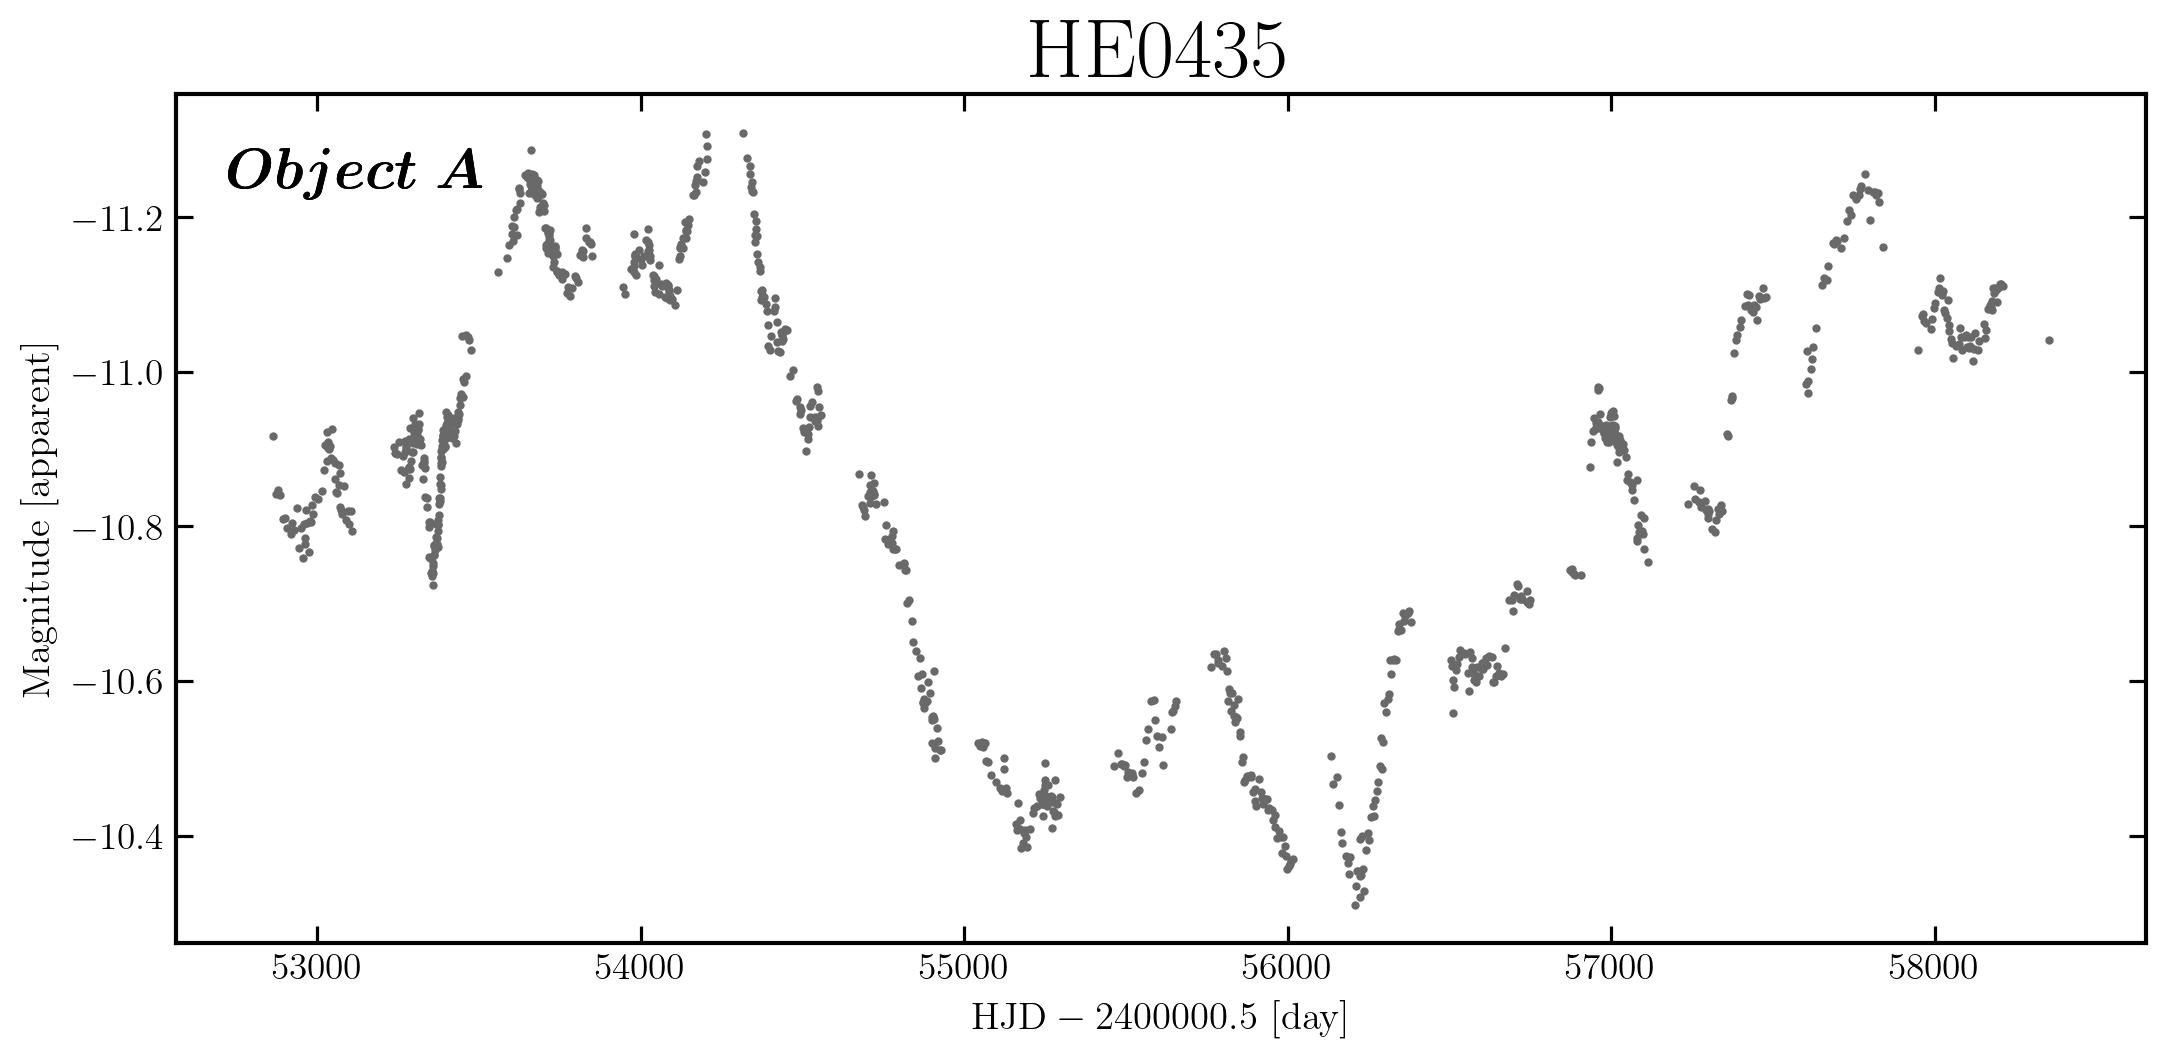

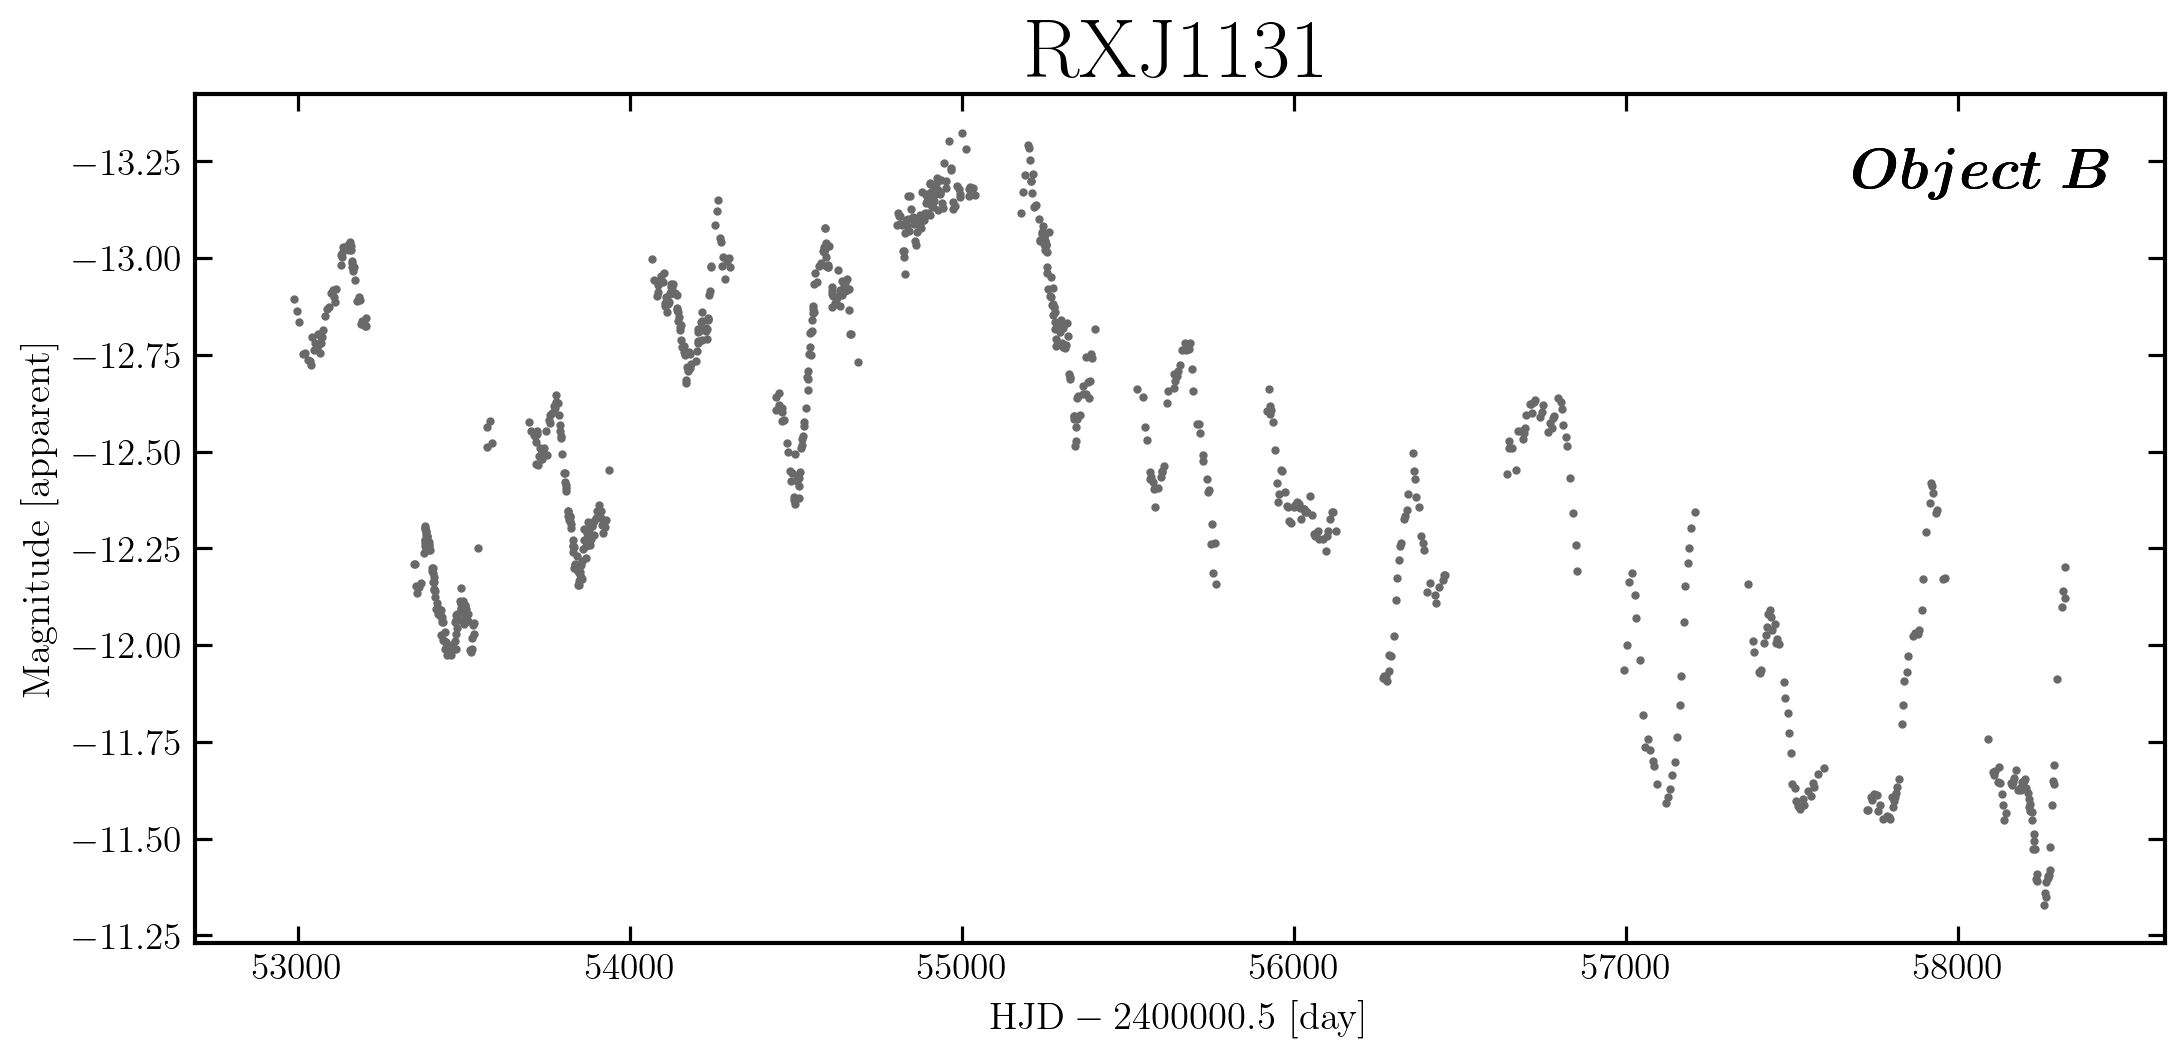

In [142]:
base_analysis(lensName="HE0435_Millon2020").plot(lensObject='A');
base_analysis(lensName="RXJ1131_Millon2020").plot(lensObject='B');

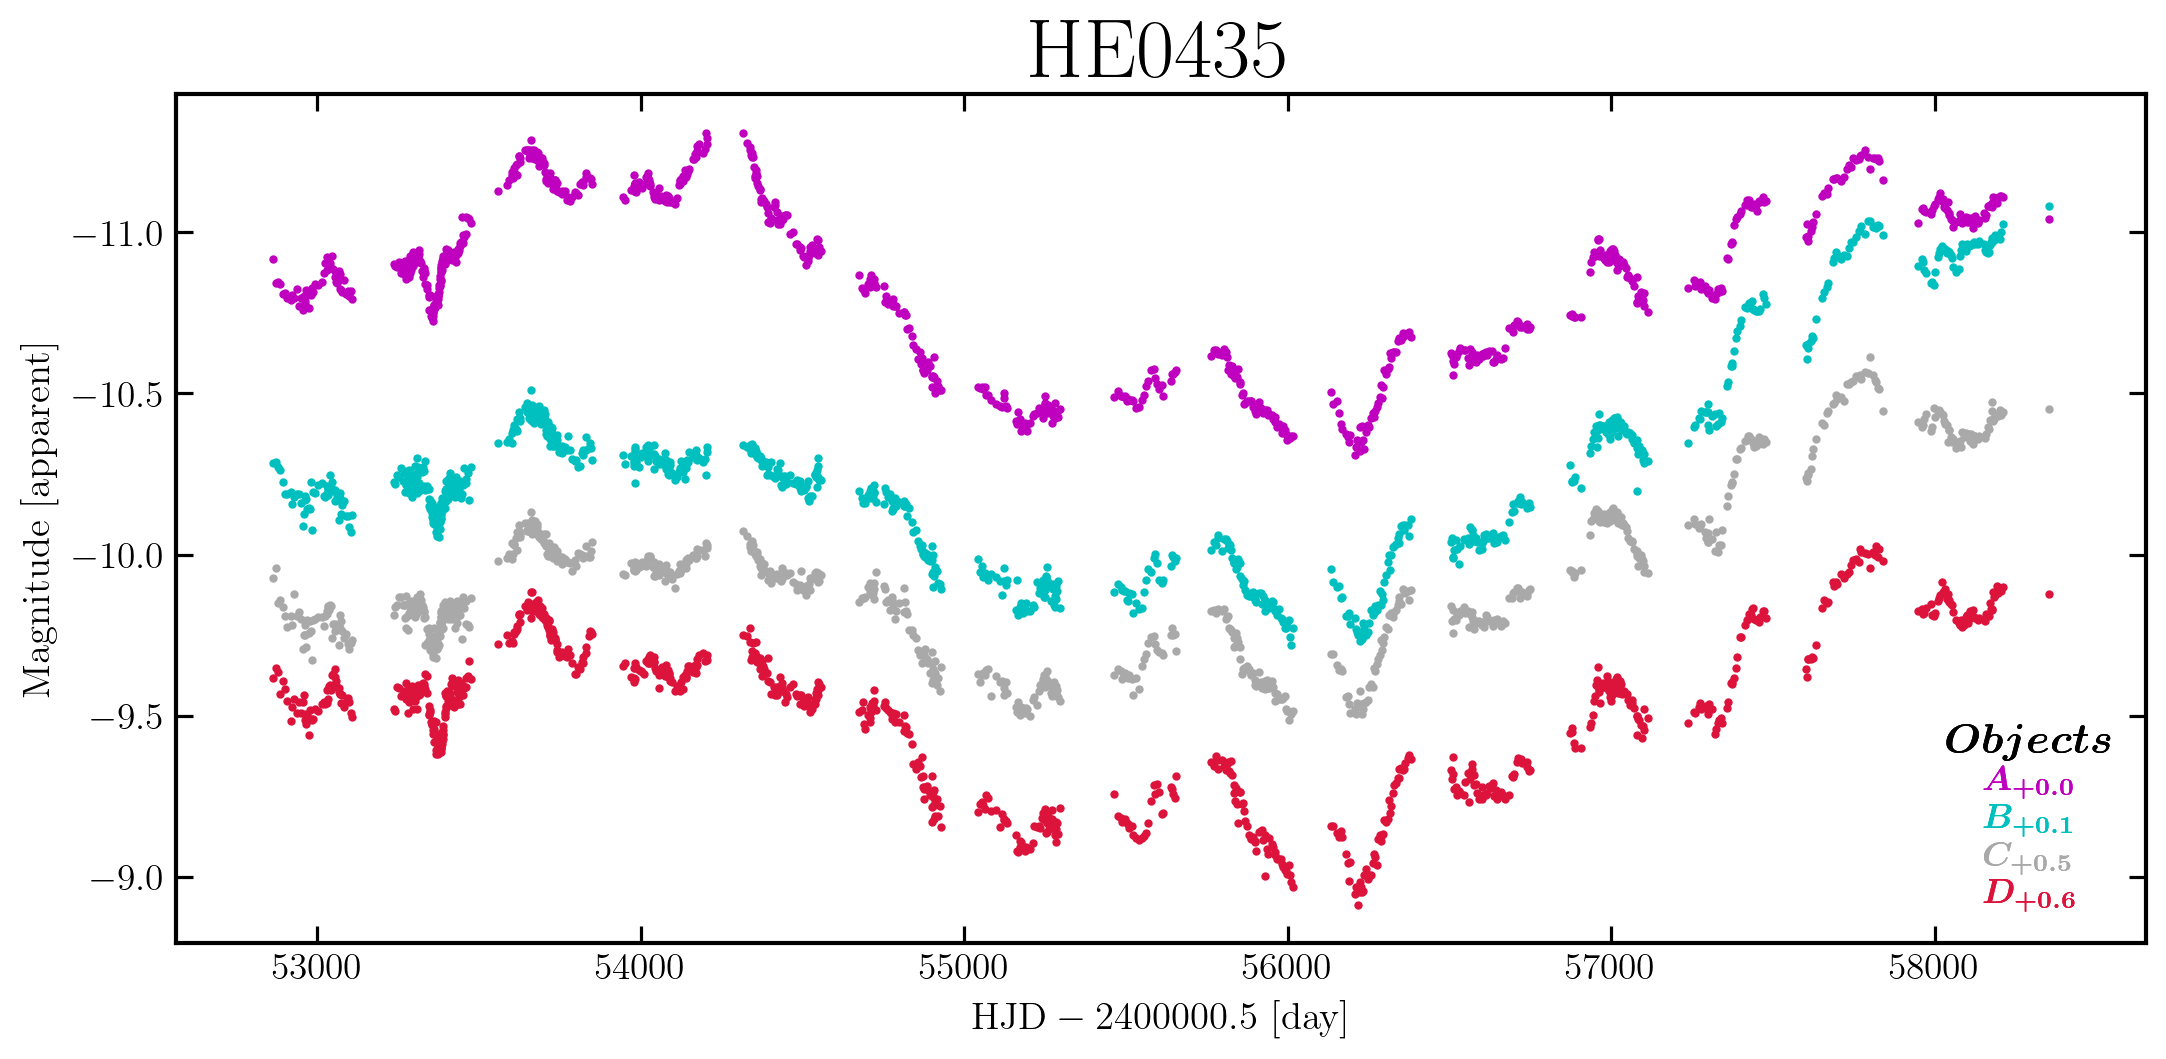

In [143]:
obj_list = ["A", "B", "C", "D"]
seperators = [0.0, 0.1, 0.5, 0.6]
base_analysis(lensName="HE0435_Millon2020").plot(lensObject=obj_list, mag_sep=seperators);

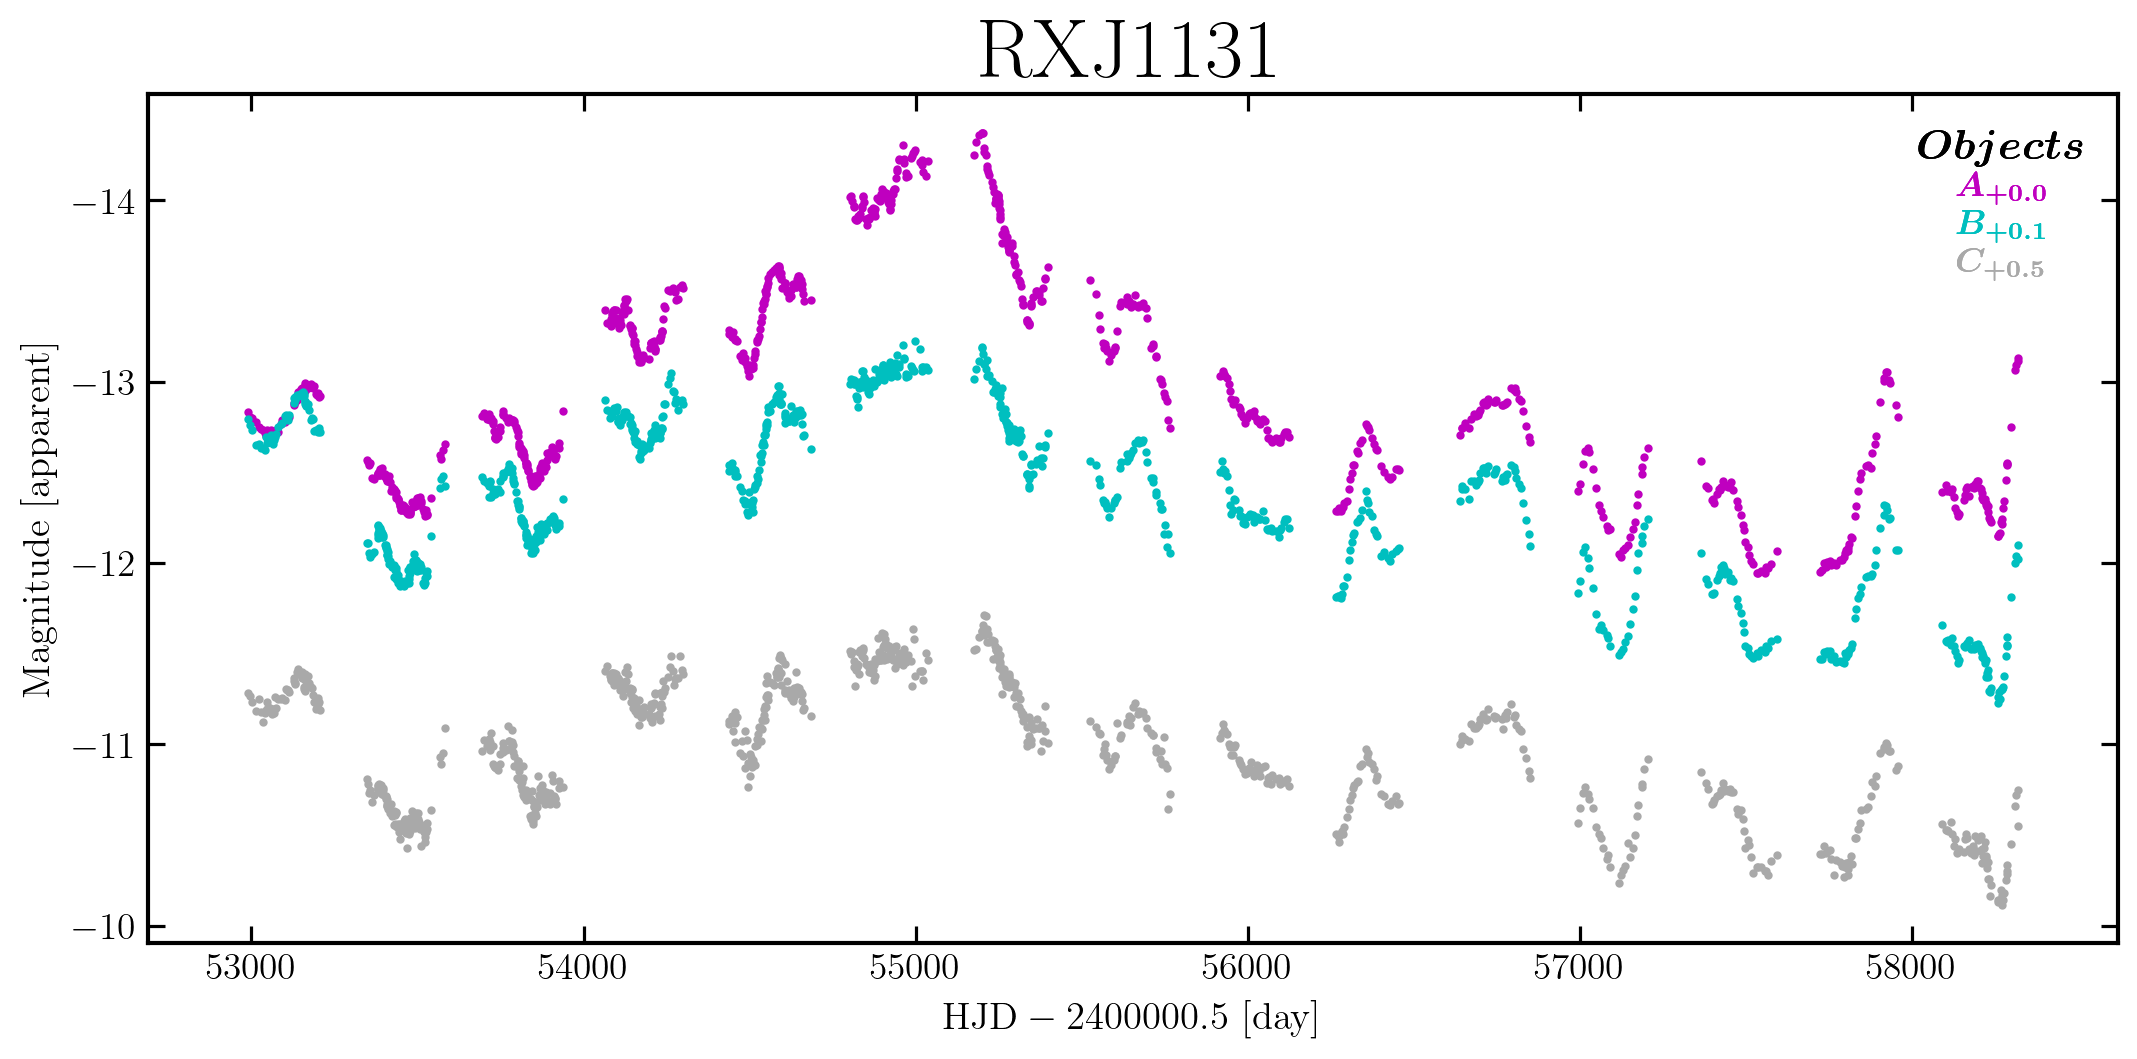

In [140]:
obj_list = ["A", "B", "C"]
seperators = [0.0, 0.1, 0.5]
base_analysis(lensName="RXJ1131_Millon2020").plot(lensObject=obj_list, mag_sep=seperators);

In [153]:
# Some exception catching
base_analysis(lensName="HE0435_Millon2020").plot(lensObject='E');
base_analysis(lensName="HE0435_Millon2020").plot();

!!! Must specify object from available list: ['A', 'B', 'C', 'D'] !!!


ValueError: !!! Must specify object from available list: ['A', 'B', 'C', 'D'] !!!

---
# Spline interpolation schemes:

* Play with univariate spline

* Manually place knots center of observational recordings.

In [134]:
class spline_analysis(base_analysis):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def time_array(self, nbins: int = 500) -> float:
        df = self.load_df()
        return np.linspace(df.index[0], df.index[-1], nbins)
        
    def UnivariateSpline(self, x_data: float = None, y_data: float = None, apply_all: bool = True, 
                               w: float = None, bbox: float = [None, None], 
                               k: int = 3, s: float = None, ext: int = 0, check_finite: bool = False,
                               *args, **kwargs) -> float:
        results = dict()
        
        df = self.load_df()
        
        # by default apply the univariate spline fit to a given x and y array,
        # else can apply to all magnitude date
        from scipy.interpolate import UnivariateSpline
        
        if apply_all:
            results['A'] = UnivariateSpline(df.index[:], df.mag_A[:], s=s, k=k, *args, **kwargs)
            results['B'] = UnivariateSpline(df.index[:], df.mag_B[:], s=s, k=k, *args, **kwargs)  
            results['C'] = UnivariateSpline(df.index[:], df.mag_C[:], s=s, k=k, *args, **kwargs)  
            results['D'] = UnivariateSpline(df.index[:], df.mag_D[:], s=s, k=k, *args, **kwargs)  
        else:
            results['spline'] = UnivariateSpline(x_data, y_data, *args, **kwargs)
        return results
    
    

### Set constant smoothing function but vary degree of smoothing spline by integers

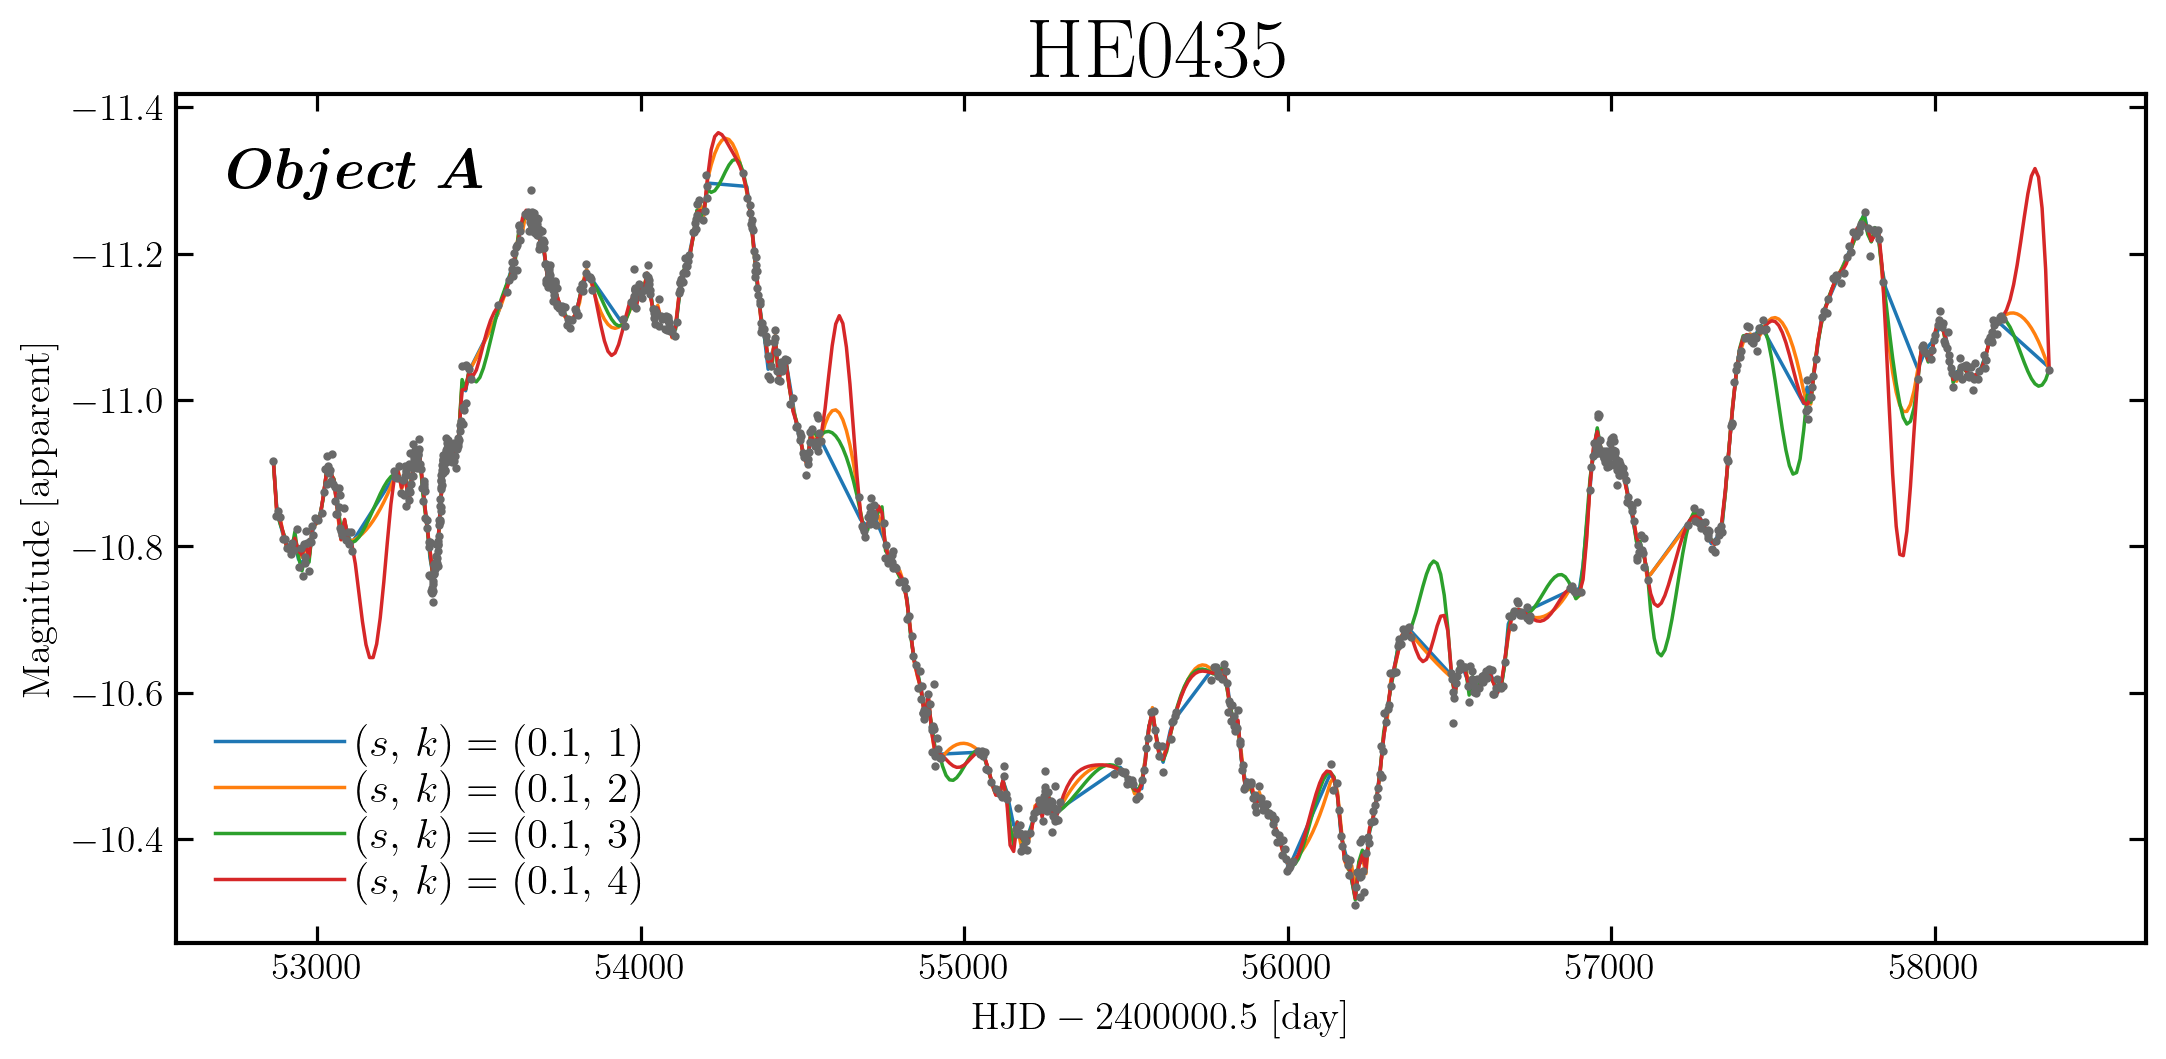

In [137]:
spl = spline_analysis(lensName="HE0435_Millon2020")

# initialize plot
fig, ax = spl.plot(lensObject="A")

# time array
tarr = spl.time_array()

sf = 0.1 # smoothing factor
for k in range(1, 5): # degree of smoothing spline
    uspl = app.UnivariateSpline(s=sf, k=k)
    ax.plot(tarr, uspl[obj](tarr), lw=1.25, label=rf'$(s,\, k) = ({sf},\, {k})$', zorder=0);
ax.legend(frameon=False, loc='lower left', fontsize=15.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);

### Vary smoothing factor for a cubic spline

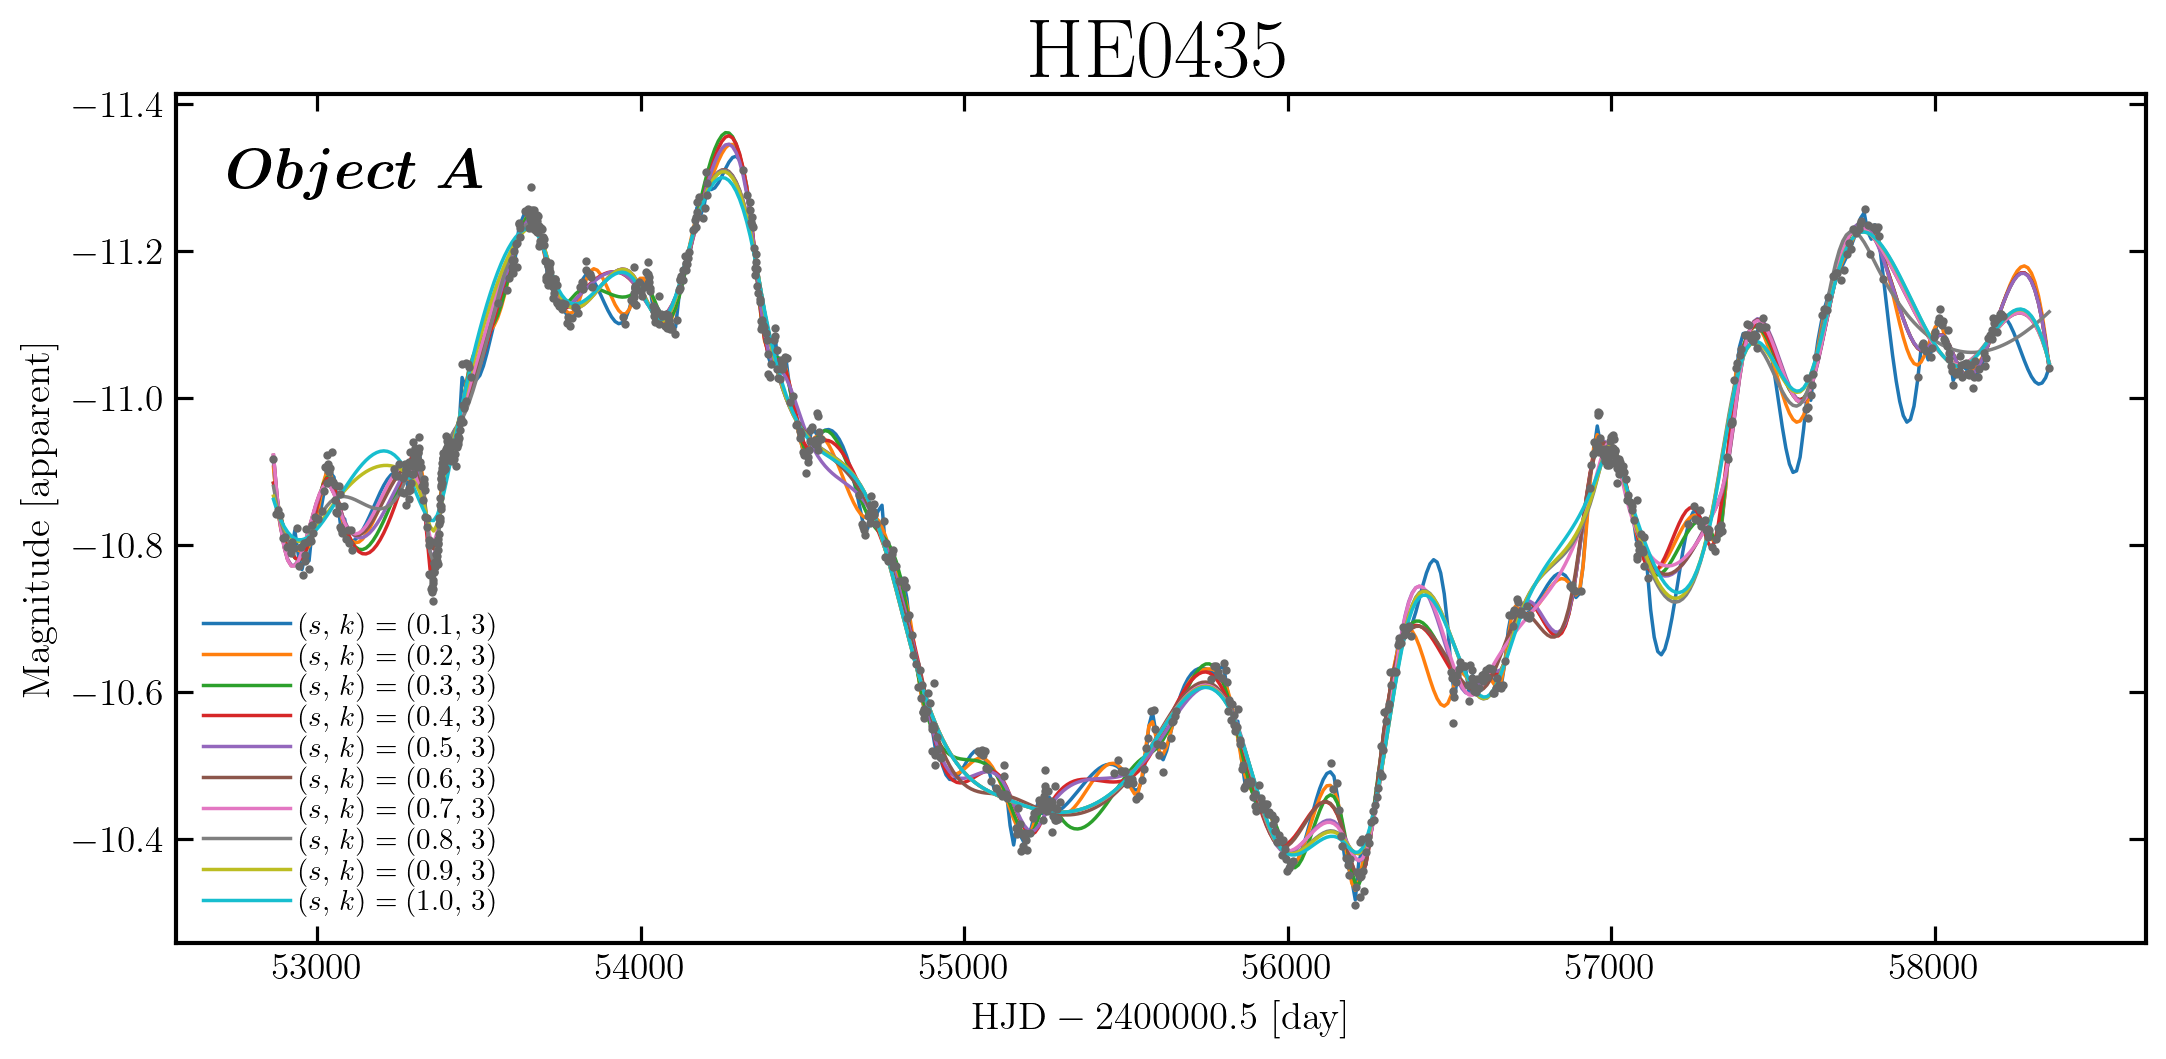

In [138]:
spl = spline_analysis(lensName="HE0435_Millon2020")

# initialize plot
fig, ax = spl.plot(lensObject="A")

# time array
tarr = spl.time_array()

k = 3 # cubic spline
for sf in np.linspace(0.1, 1.0, 10): # degree of smoothing spline
    uspl = app.UnivariateSpline(s=sf, k=k)
    ax.plot(tarr, uspl[obj](tarr), lw=1.25, label=rf'$(s,\, k) = ({sf:0.1f},\, {k})$', zorder=0)
ax.legend(frameon=False, loc='lower left', fontsize=10.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);

---
# Gaussian Process Regression

In [139]:
#!!! Class method is a work in progress

class gaussian_process(base_analysis):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def time_array(self, nbins: int = 500) -> float:
        df = self.load_df()
        return np.linspace(df.index[0], df.index[-1], nbins)

    def GPR(self, kernel, x_data: float = None, y_data: float = None, apply_all: bool = True) -> float:
        """
        """
        results = dict()
        
        from sklearn.gaussian_process import GaussianProcessRegressor
        
        df = self.load_df()
        
        X_train, Y_train = df.index[:], df.mag_A[:]
        
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        gp.fit(X_train, Y_train)
        
        """
        if apply_all:
            results = []
        else:
            pass
        """
        return results

## Test idea of Kernel

In [227]:
# Radial Basis Function (RBF)
def RBF_test(xi: float, xj:float) -> float:
    sqdist = np.sum(xi**2, axis=1).reshape(-1, 1) + np.sum(xj**2, axis=1) - 2.0*np.dot(xi, xj.T)
    return np.exp(-sqdist/2.0)

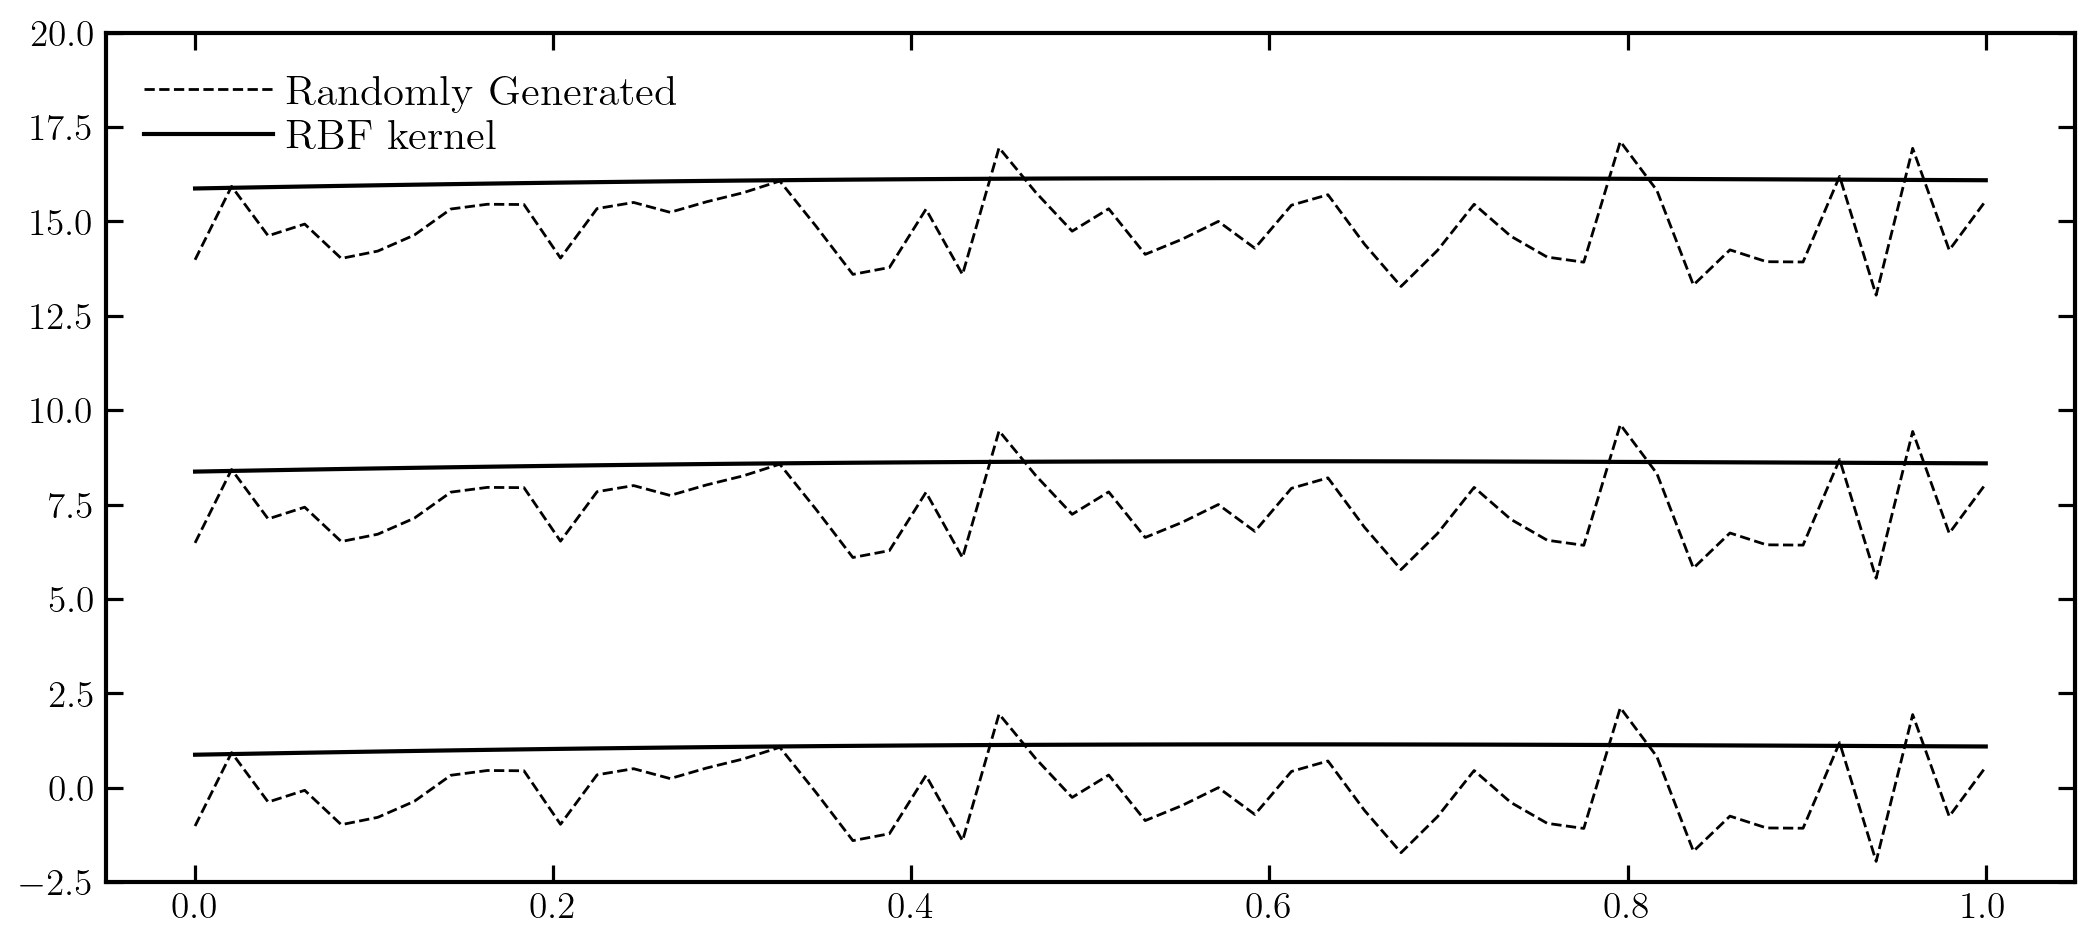

In [228]:
fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                        nrows=1, ncols=1, dpi=100)
ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
ax.set_xscale('linear'); ax.set_yscale('linear');
ax.set_ylim(-2.5, 20)

# randomly sampled points from random distribution with kernel smoothing
n, m = 50, 3
mean, cov = np.zeros(n), np.eye(n)
fpr = np.random.multivariate_normal(mean, cov, m).T
xarr = np.linspace(0, 1, n).reshape(-1, 1)   # n number test points in the range of (0, 1)
shift_arr = np.linspace(0*m, 5*m, m)
for ind in range(m):
    ax.plot(xarr, fpr[:, 0] + shift_arr[ind], ls='--', lw=1, color='k')

# apply kernel
k1 = RBF_test(xarr, xarr) 
fpr_k1 = np.random.multivariate_normal(mean, k1, m).T
for ind in range(m):
    ax.plot(xarr, fpr_k1[:, 0] + shift_arr[ind], ls='-', lw=1.5, color='k')

ax.plot([0, 0], [0, 0], ls='--', lw=1, color='k', label=r'$\rm Randomly\ Generated$')  
ax.plot([0, 0], [0, 0], ls='-', lw=1.5, color='k', label=r'$\rm RBF\ kernel$')    
ax.legend(frameon=False, loc='best', fontsize=15.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);
    
plt.show()

--- 
### Test Implementation

In [362]:
# Radial Basis Function (RBF) // Gaussian kernel
def RBF(xi: float, xj:float) -> float:
    ampl, corr_len = 1.0, 0.5
    sqdist = np.sum(xi**2, axis=1).reshape(-1, 1) + np.sum(xj**2, axis=1) - 2.0*np.dot(xi, xj.T)
    return ampl**2 * np.exp(-sqdist/2.0/corr_len**2)

# Damped Random Walk (DRW)
def DRW(xi: float, xj:float) -> float:
    ampl, corr_len = 1.0, 50.0
    sqdist = np.sum(xi**2, axis=1).reshape(-1, 1) + np.sum(xj**2, axis=1) - 2.0*np.dot(xi, xj.T)
    return ampl**2 * np.exp(-np.sqrt(sqdist)/corr_len)

# Damped Random Walk (DRW)
def matern_i3over2(xi: float, xj:float) -> float:
    ampl, corr_len = 1.0, 0.5
    sqdist = np.sum(xi**2, axis=1).reshape(-1, 1) + np.sum(xj**2, axis=1) - 2.0*np.dot(xi, xj.T)
    comp1 = 1.0 + np.sqrt(3.0)*np.sqrt(sqdist)/corr_len
    comp2 = np.exp(-np.sqrt(3.0)*np.sqrt(sqdist)/corr_len)
    return ampl**2 * comp1 * comp2

(20, 1) (20,)
(200, 1) (20,)


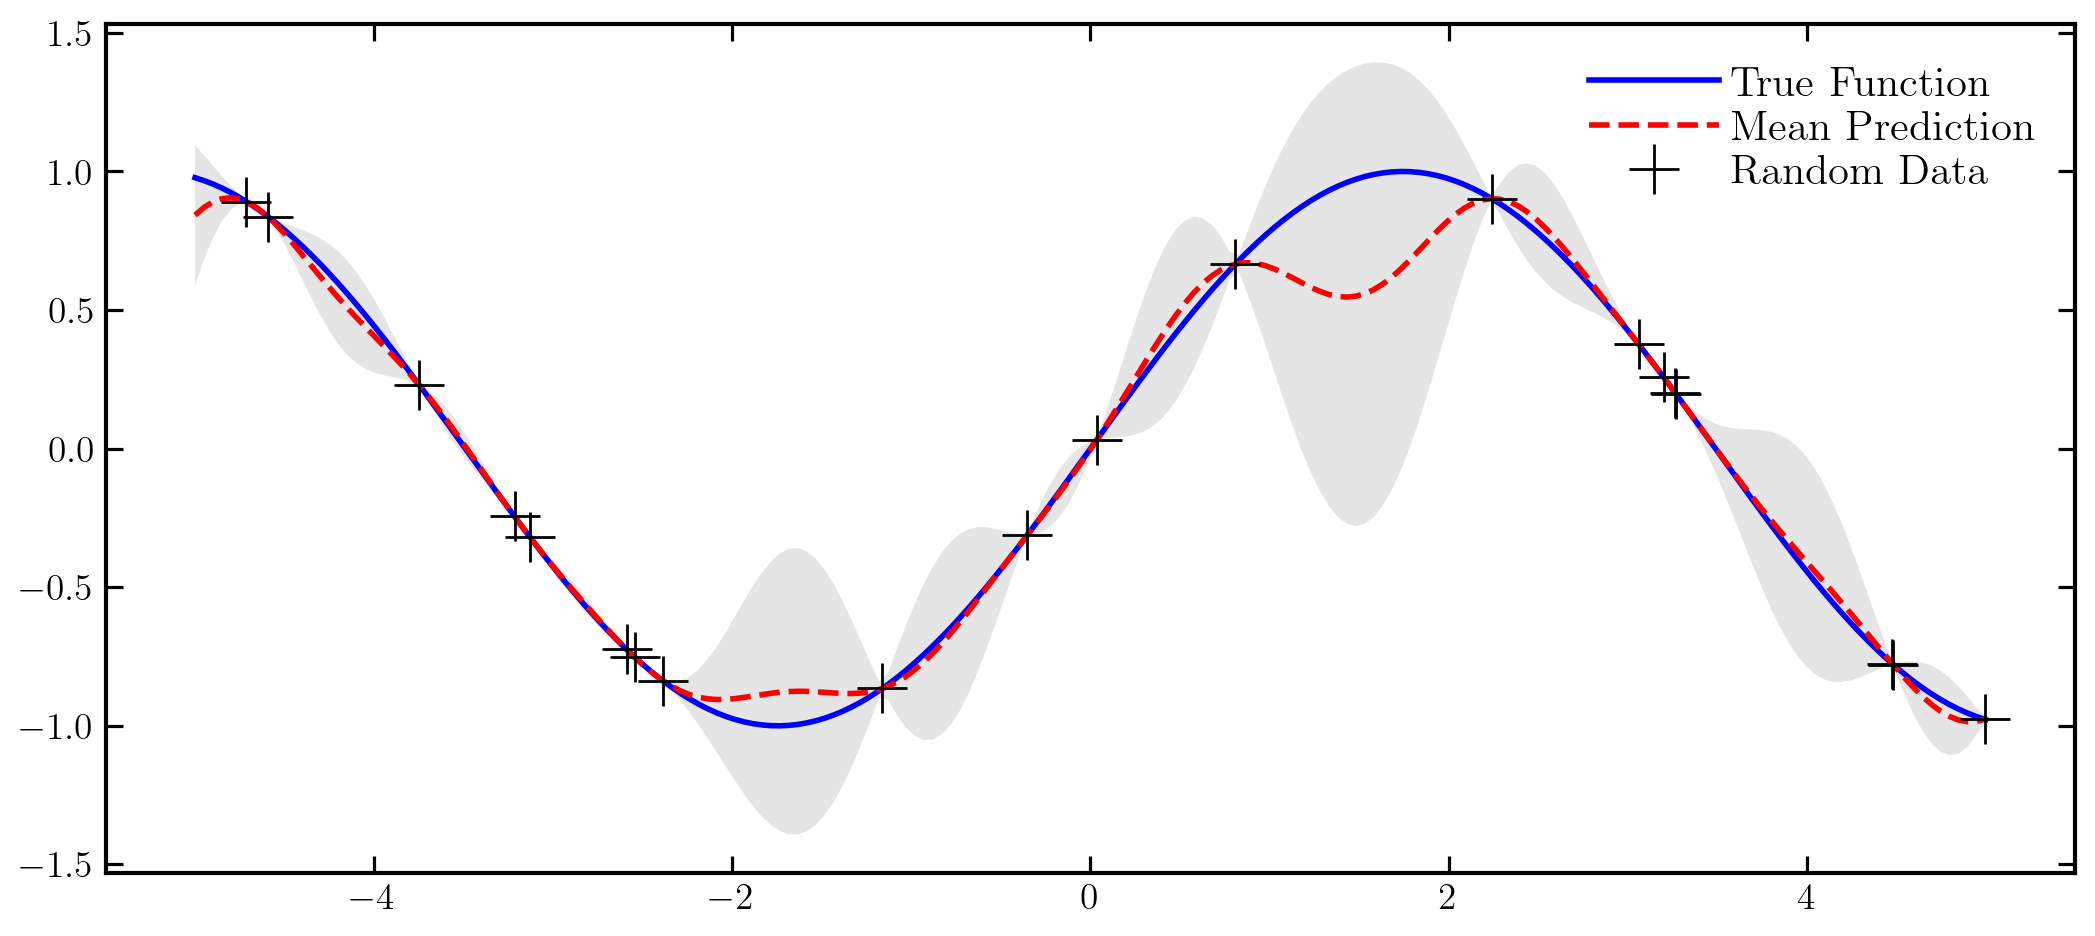

In [310]:
fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                        nrows=1, ncols=1, dpi=100)
ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
ax.set_xscale('linear'); ax.set_yscale('linear');

# Sample some input points and noisy versions of the function evaluated at
# these points. 
N = 20         # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.00005    # noise variance.
kernel = RBF
#kernel = DRW
#kernel = matern_i3over2

# true unknown function to approximate
func = lambda x: np.sin(0.9*x).flatten()
X = np.random.uniform(-5, 5, size=(N, 1))     # N training points 
y = f(X) + s*np.random.randn(N)


print(X.shape, y.shape)

# apply kernel to training points and generate correlated normally distributed 
# random samples via Cholesky decomposition
L = np.linalg.cholesky(kernel(X, X) + s*np.eye(N)) 

# test dataset; points we're going to make predictions at
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

print(Xtest.shape, y.shape)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
s2 = np.diag(kernel(Xtest, Xtest)) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)

# PLOTS:
ax.plot(Xtest, f(Xtest), 'b-', label=r'$\rm True\ Function$')
ax.fill_between(Xtest.flat, mu-s, mu+s, edgecolor="None", facecolor="k", alpha=0.1)
ax.plot(Xtest, mu, 'r--', lw=2, label=r'$\rm Mean\ Prediction$')
ax.plot(X, y, 'k+', ms=18, label=r'$\rm Random\ Data$')
ax.legend(frameon=False, loc='best', fontsize=15.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);

plt.show()

<ipython-input-368-caf756c3d17a>:23: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(variance)


(array([-10.91666   , -10.84166001,          nan, ..., -11.11443   ,
       -11.11099001, -11.04144001]), array([-10.91666   , -10.84165999,          nan, ..., -11.11443   ,
       -11.11098999, -11.04143999]))


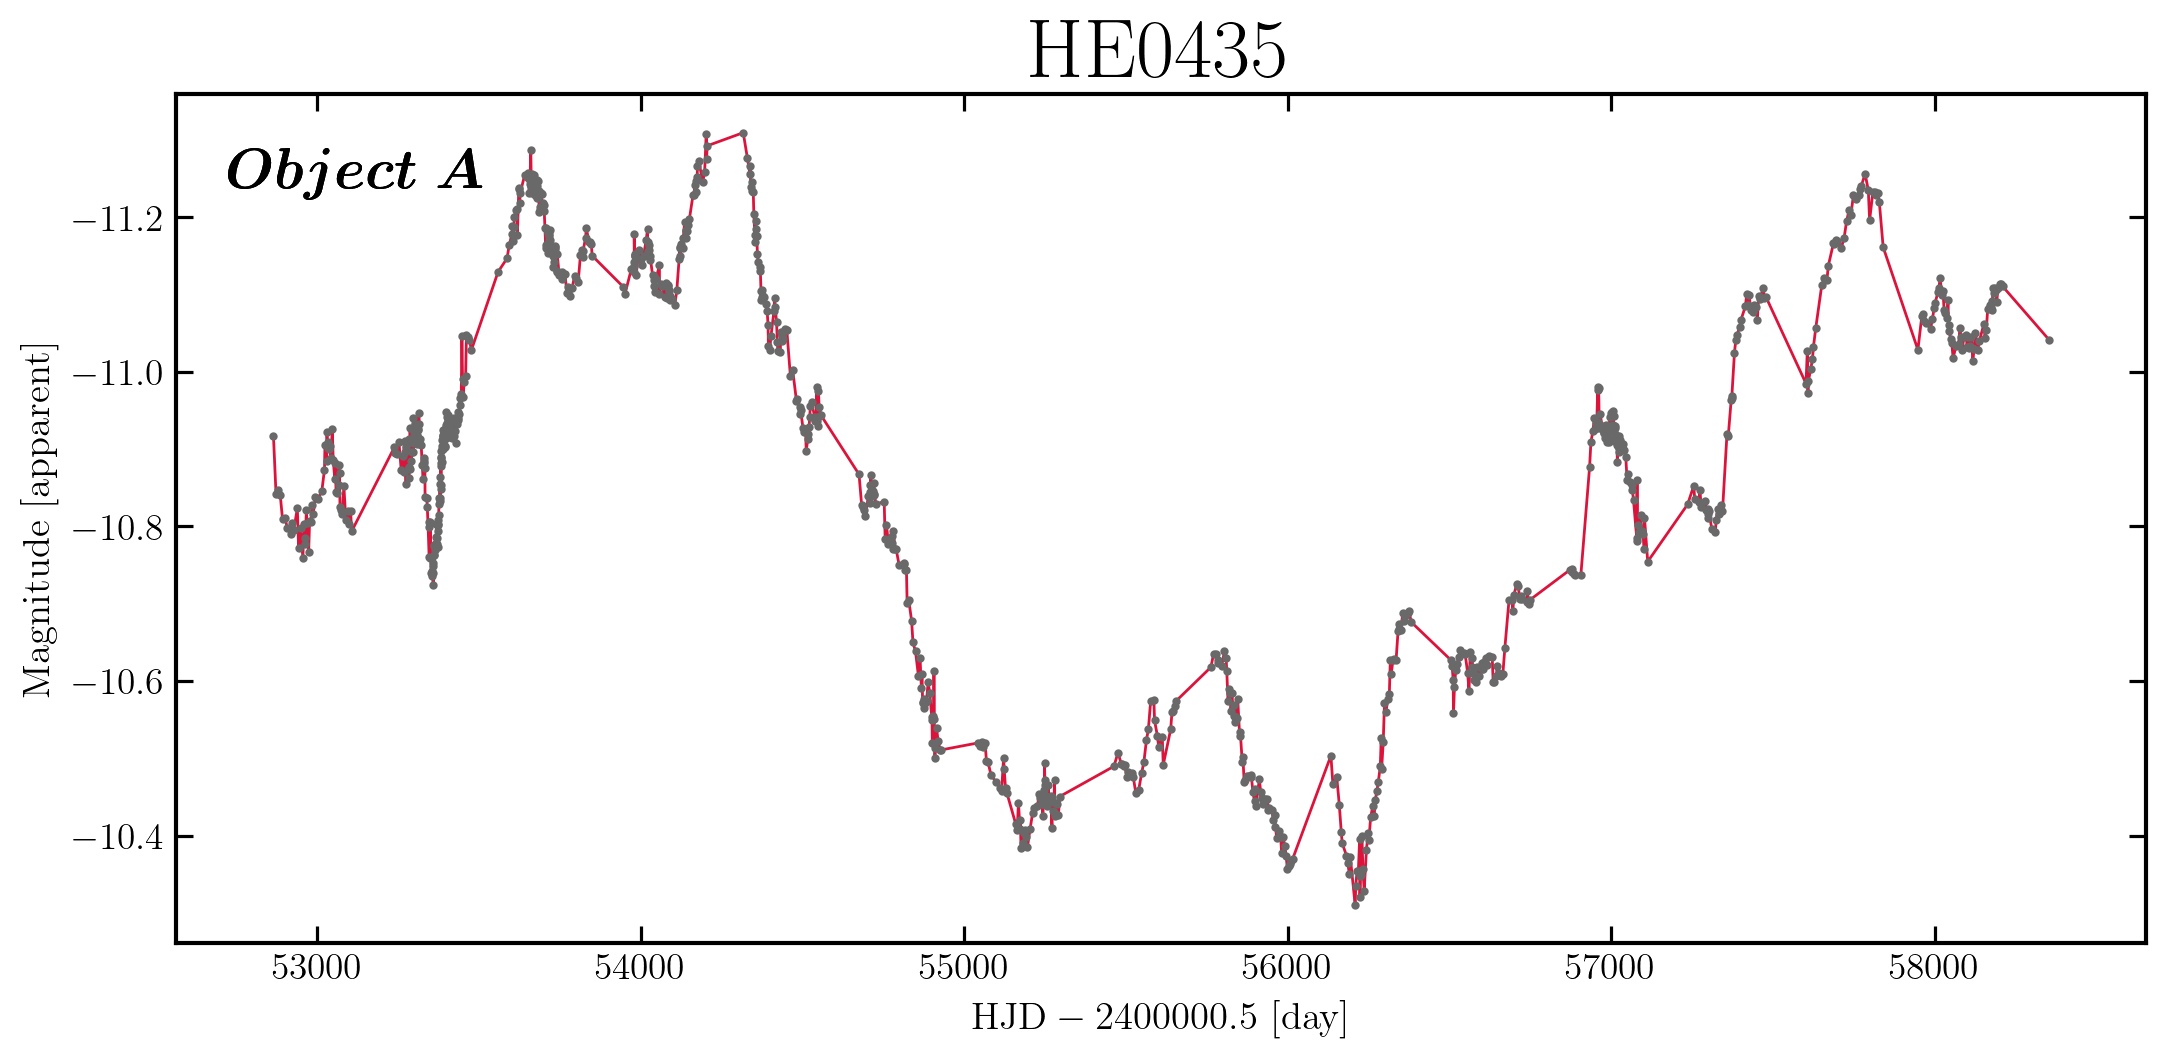

In [368]:
ba = base_analysis(lensName="HE0435_Millon2020")

# data framework
df = ba.load_df()
X, y = df.index.to_numpy(), df["mag_A"].to_numpy()

# initialize plot
fig, ax = ba.plot(lensObject="A")

X_train, y_train = np.reshape(X, (X.shape[0],1))[:], y[:] 
#print(X_train.shape, y_train.shape)
X_test, y_test = np.reshape(X[:], (-1, 1)), y[:] 
#print(X_test.shape, y_test.shape)

# kernel analysis
kernel = DRW
L = np.linalg.cholesky(kernel(X_train, X_train)) 
Lk = np.linalg.solve(L, kernel(X_train, X_test))
mu = np.dot(Lk.T, np.linalg.solve(L, y_train))    

# compute the variance at our test points.
variance = np.diag(kernel(X_test, X_test)) - np.sum(Lk**2, axis=0)   
sigma = np.sqrt(variance)


disp_bounds = (mu-sigma, mu+sigma)
print(disp_bounds)
#ax.fill_between(X_test.flat, disp_bounds[0], disp_bounds[1], edgecolor="None", facecolor="k", alpha=0.1, zorder=0)
ax.plot(X_test, mu, ls='-', color='crimson', lw=1, label=r'$\rm Mean\ Prediction$', zorder=0)
#ax.legend(frameon=False, loc='best', fontsize=15.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);


plt.show()